In [27]:
#Import the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.patches import Rectangle
%matplotlib inline

### Looking at Neighbourhoods

### 1. Boston's Data

In [2]:
# Read in the Boston Data
df_bos = pd.read_csv('./listings_boston.csv')
df_bos.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,32,19,2021-02-26,0.27,1,106
1,6695,$99 Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,169,29,115,2019-11-02,0.81,4,40
2,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,NaN,Back Bay,42.35061,-71.08787,Entire home/apt,96,29,5,2020-12-02,0.08,11,307
3,10986,North End (Waterfront area) CLOSE TO MGH & SU...,38997,Michelle,NaN,North End,42.36377,-71.05206,Entire home/apt,96,29,2,2016-05-23,0.03,11,293
4,13247,Back Bay studio apartment,51637,Susan,NaN,Back Bay,42.35164,-71.08752,Entire home/apt,75,91,0,NaN,NaN,2,0


In [3]:
df_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3146 non-null   int64  
 1   name                            3146 non-null   object 
 2   host_id                         3146 non-null   int64  
 3   host_name                       3068 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   3146 non-null   object 
 6   latitude                        3146 non-null   float64
 7   longitude                       3146 non-null   float64
 8   room_type                       3146 non-null   object 
 9   price                           3146 non-null   int64  
 10  minimum_nights                  3146 non-null   int64  
 11  number_of_reviews               3146 non-null   int64  
 12  last_review                     21

* Of the two Neighbourhood related category columns, only `neighbourhood`contains any data.

In [4]:
print (df_bos.neighbourhood.unique())
print (df_bos.neighbourhood.nunique())

['East Boston' 'Roxbury' 'Back Bay' 'North End' 'Beacon Hill' 'Dorchester'
 'South End' 'Charlestown' 'Jamaica Plain' 'Downtown' 'South Boston'
 'Allston' 'Bay Village' 'Brighton' 'West Roxbury' 'Roslindale'
 'Mission Hill' 'Fenway' 'Hyde Park' 'West End' 'Mattapan'
 'South Boston Waterfront' 'Chinatown' 'Longwood Medical Area'
 'Leather District']
25


In [5]:
df_bos_hood = df_bos.groupby(['neighbourhood']).name.nunique()

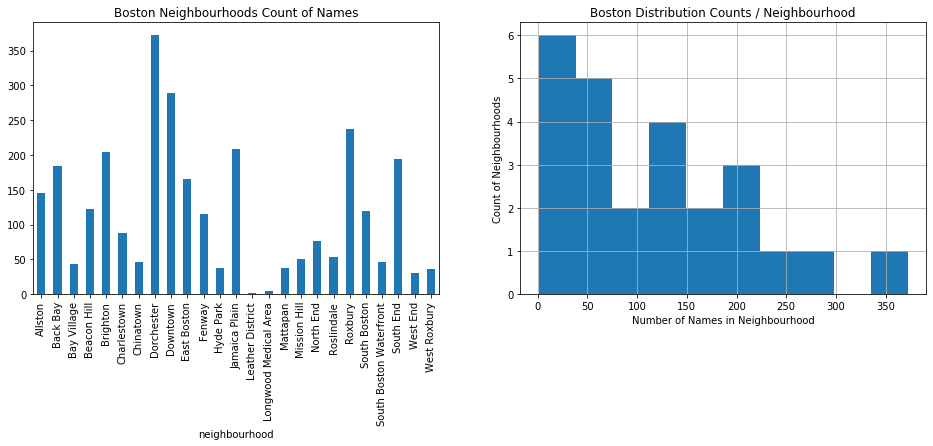

In [6]:
plt.figure(figsize = [16, 5])

# bar chart on the left
plt.subplot(1, 2, 1)
df_bos_hood.plot(kind="bar");
plt.title("Boston Neighbourhoods Count of Names");

# distribution on the right
plt.subplot(1, 2, 2)
df_bos_hood.hist();
plt.xlabel('Number of Names in Neighbourhood')
plt.ylabel('Count of Neighbourhoods')
plt.title("Boston Distribution Counts / Neighbourhood");

In [7]:
df_bos_hood.describe()

count     25.000000
mean     116.280000
std       95.178131
min        1.000000
25%       43.000000
50%       88.000000
75%      184.000000
max      372.000000
Name: name, dtype: float64

* `neighbourhood` is complete, and refers to 25 unique neighbourhoods.
* Average 116 ids per neighbourhood, although the number of ids per neighbourhood varies greatly considering the standard deviation is 95

### 1. Seattle's Data

In [8]:
#Read in the Seattle Data
df_sea = pd.read_csv('./listings_seattle.csv')
df_sea.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61094,-122.29286,Entire home/apt,349,30,32,2020-02-01,0.21,2,107
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,148,2019-12-27,1.14,7,352
2,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55539,-122.38474,Entire home/apt,165,3,41,2020-11-26,0.37,2,210
3,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55624,-122.38598,Entire home/apt,125,3,56,2021-02-19,0.50,2,217
4,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65479,-122.33652,Entire home/apt,100,4,97,2020-09-28,0.82,2,23


In [9]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4213 non-null   int64  
 1   name                            4213 non-null   object 
 2   host_id                         4213 non-null   int64  
 3   host_name                       4021 non-null   object 
 4   neighbourhood_group             4213 non-null   object 
 5   neighbourhood                   4213 non-null   object 
 6   latitude                        4213 non-null   float64
 7   longitude                       4213 non-null   float64
 8   room_type                       4213 non-null   object 
 9   price                           4213 non-null   int64  
 10  minimum_nights                  4213 non-null   int64  
 11  number_of_reviews               4213 non-null   int64  
 12  last_review                     34

* Both Neighbourhood related category columns, `neighbourhood` and `neighbourhood_group`contain data.

In [10]:
print (df_sea.neighbourhood.unique())
print (df_sea.neighbourhood.nunique())

['Madrona' 'Georgetown' 'Fairmount Park' 'Wallingford' 'High Point'
 'Whittier Heights' 'Eastlake' 'Loyal Heights' 'Mid-Beacon Hill'
 'Windermere' 'Alki' 'Fremont' 'Green Lake' 'Seward Park'
 'Harrison/Denny-Blaine' 'Portage Bay' 'Phinney Ridge' 'Crown Hill'
 'Belltown' 'Lawton Park' 'Matthews Beach' 'North Admiral'
 'North Queen Anne' 'West Queen Anne' 'First Hill' 'Stevens' 'Broadway'
 'Arbor Heights' 'North Beacon Hill' 'Cedar Park' 'Pike-Market'
 'Columbia City' 'Lower Queen Anne' 'Mount Baker' 'Mann' 'Genesee'
 'Central Business District' 'Greenwood' 'Ravenna' 'University District'
 'South Delridge' 'Atlantic' 'Broadview' 'Adams' 'Maple Leaf'
 'East Queen Anne' 'Minor' 'Pioneer Square' 'Highland Park'
 'West Woodland' 'Montlake' 'Haller Lake' 'Madison Park' 'Fauntleroy'
 'Westlake' 'Sunset Hill' 'North Beach/Blue Ridge' 'Briarcliff'
 'North College Park' 'Leschi' 'Victory Heights' 'Brighton' 'Interbay'
 'Bitter Lake' 'View Ridge' 'Southeast Magnolia' 'North Delridge'
 'Seaview' 'Y

In [11]:
print (df_sea.neighbourhood_group.unique())
print (df_sea.neighbourhood_group.nunique())

['Central Area' 'Other neighborhoods' 'West Seattle' 'Delridge' 'Ballard'
 'Cascade' 'Beacon Hill' 'Seward Park' 'Capitol Hill' 'Downtown'
 'Magnolia' 'Lake City' 'Queen Anne' 'Rainier Valley'
 'University District' 'Northgate' 'Interbay']
17


* Unlike Boston both Neighbourhood related category columns `neighbourhood` and `neighbourhood_group` contain any data.
* Compared to Boston, there are more than 3 times as many neighbourhoods, but when grouped, there are a similar number of neighbourhood groups in Seattle as neighbourhoods in Boston

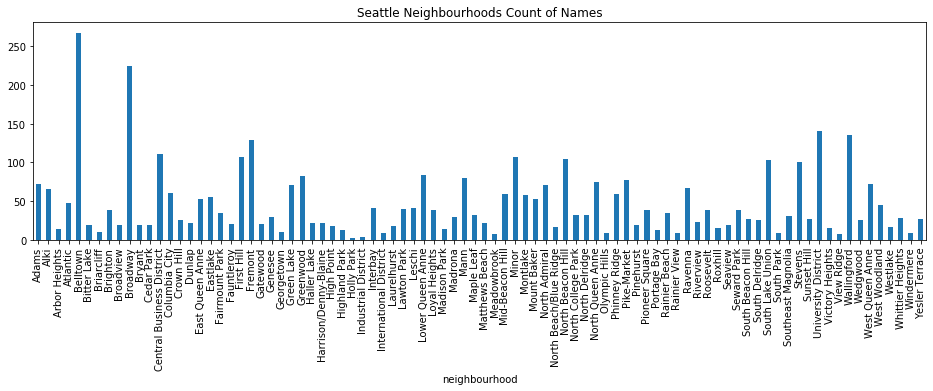

In [12]:
df_sea_hood = df_sea.groupby(['neighbourhood']).name.nunique()
df_sea_hood.plot(figsize = [16,4], kind="bar");
plt.title("Seattle Neighbourhoods Count of Names");

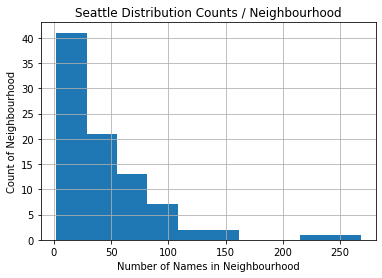

In [13]:
df_sea_hood.hist();
plt.xlabel('Number of Names in Neighbourhood')
plt.ylabel('Count of Neighbourhood')
plt.title("Seattle Distribution Counts / Neighbourhood");

In [14]:
df_sea_hood.describe()

count     88.000000
mean      46.454545
std       44.991930
min        2.000000
25%       19.000000
50%       31.500000
75%       62.000000
max      268.000000
Name: name, dtype: float64

In [15]:
df_sea_group = df_sea.groupby(['neighbourhood_group']).name.nunique()

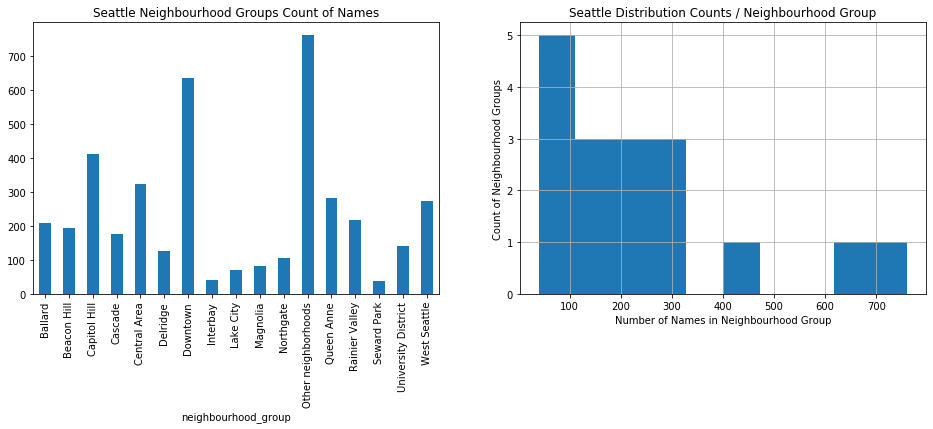

In [16]:
plt.figure(figsize = [16, 5])

# bar chart on the left
plt.subplot(1, 2, 1)
df_sea_group.plot(kind="bar");
plt.title("Seattle Neighbourhood Groups Count of Names");

# distribution chart on the left
plt.subplot(1, 2, 2)
df_sea_group.hist();
plt.xlabel('Number of Names in Neighbourhood Group')
plt.ylabel('Count of Neighbourhood Groups')
plt.title("Seattle Distribution Counts / Neighbourhood Group");

In [17]:
df_sea_group.describe()

count     17.000000
mean     240.176471
std      201.305500
min       39.000000
25%      105.000000
50%      193.000000
75%      282.000000
max      761.000000
Name: name, dtype: float64

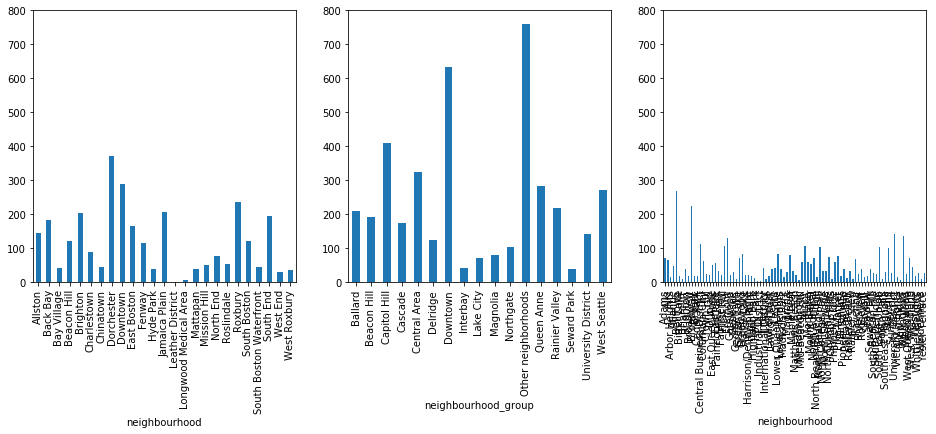

In [18]:
plt.figure(figsize = [16, 5])

# bar chart on the left, Boston Neighbourhoods
plt.subplot(1, 3, 1)
plt.ylim([0, 800])
df_bos_hood.plot(kind="bar");
# bar chart in the middle, Seattle Neighbourhood Groups
plt.subplot(1, 3, 2)
plt.ylim([0, 800])
df_sea_group.plot(kind="bar");
# bar chart on the right, Seattle Neighbourhoods
plt.subplot(1, 3, 3)
plt.ylim([0, 800])
df_sea_hood.plot(kind="bar");

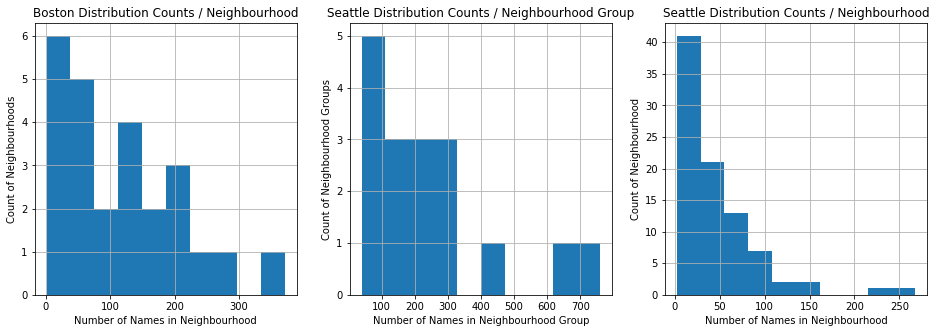

In [19]:
plt.figure(figsize = [16, 5])

# on the left, Boston Neighbourhoods
plt.subplot(1, 3, 1)
df_bos_hood.hist();
plt.xlabel('Number of Names in Neighbourhood')
plt.ylabel('Count of Neighbourhoods')
plt.title("Boston Distribution Counts / Neighbourhood");
# in the middle, Seattle Neighbourhood Groups
plt.subplot(1, 3, 2)
df_sea_group.hist();
plt.xlabel('Number of Names in Neighbourhood Group')
plt.ylabel('Count of Neighbourhood Groups')
plt.title("Seattle Distribution Counts / Neighbourhood Group");
# on the right, Seattle Neighbourhoods
plt.subplot(1, 3, 3)
df_sea_hood.hist();
plt.xlabel('Number of Names in Neighbourhood')
plt.ylabel('Count of Neighbourhood')
plt.title("Seattle Distribution Counts / Neighbourhood");

#### Observations
* 88 neighbourhoods compared to 25 neighbourhood groups in Seattle
* 17 neighbourhoods in Boston, no neighbourhood groups defined
* Comparable number of Boston Neighbourhoods and Seattle Neighbourhood Groups
* Typically up to 300 Names per Neighbourhood in Boston, and up to 325 Names per Neighbourhood Group in Seattle
#### Decision: 
* Use  neighbourhood from Boston Data, neighbourhood_groups from Seattle Data
* Check `Other neighbourhoods` in Seattle to see if these neighbourhoods belong in named neighbourhood groups.

#### Check `Other neighbourhoods`
Generate visualisation to show postion of neighbourhood_groups compared with the position of neighbourhoods from `Other neighbourhoods` to see if a more precise allocation of these neighbourhoods is possible

In [20]:
# Function to provide range value for Latitude and Longitude for Neighbourhoods and Neighbourhood Groups
def max_min(x):
    return x.max() - x.min()

max_min.__name__ = 'range'

Initial analysis shows that 'Other neigbourhoods' are spread accross Seattle when comparing Latitude an Longitude values:

In [21]:
pd.DataFrame(df_sea.query("neighbourhood_group == 'Other neighborhoods' ").agg({'latitude':['min','max',max_min],
                                                              'longitude':['min','max',max_min]}))

,latitude,longitude
min,47.51967,-122.40011
max,47.73332,-122.25986
range,0.21365,0.14025


In [22]:
pd.DataFrame(df_sea.agg({'latitude':['min','max',max_min],'longitude':['min','max',max_min]}))

,latitude,longitude
min,47.49621,-122.41876
max,47.73399,-122.24198
range,0.23778,0.17678


In [23]:
# Create a dataframe df_sea_group containing latitude and Longitude information for all neighbourhood_groups other than 'Other neighbourhoods'
df_sea_lat = df_sea.query("neighbourhood_group != 'Other neighborhoods' ").groupby(['neighbourhood_group']).agg({'latitude':['min','max',max_min]}).reset_index()
df_sea_lat.columns.set_levels(['latitude_min','latitude_max','latitude_ran',
                                 'neighbourhood_group'],level=1,inplace=True)
df_sea_lat.columns = [col[1] for col in df_sea_lat.columns]

df_sea_lon = df_sea.query("neighbourhood_group != 'Other neighborhoods' ").groupby(['neighbourhood_group']).agg({'longitude':['min','max',max_min]}).reset_index()
df_sea_lon.columns.set_levels(['longitude_min','longitude_max','longitude_ran',
                                 'neighbourhood_group'],level=1,inplace=True)
df_sea_lon.columns = [col[1] for col in df_sea_lon.columns]

df_sea_map = pd.merge(df_sea_lat, df_sea_lon, left_on='neighbourhood_group', right_on='neighbourhood_group', how='left')
df_sea_map.head()

,neighbourhood_group,latitude_min,latitude_max,latitude_ran,longitude_min,longitude_max,longitude_ran
0,Ballard,47.66177,47.69044,0.02867,-122.40630,-122.36084,0.04546
1,Beacon Hill,47.51504,47.59336,0.07832,-122.31827,-122.27990,0.03837
2,Capitol Hill,47.61293,47.65112,0.03819,-122.33052,-122.27713,0.05339
3,Cascade,47.61854,47.65117,0.03263,-122.34675,-122.32271,0.02404
4,Central Area,47.58002,47.62564,0.04562,-122.31672,-122.28204,0.03468


In [24]:
# Create a dataframe df_sea_other containing latitude and Longitude information for all neighbourhoods in 'Other neighbourhoods'
df_sea_lat2 = df_sea.query("neighbourhood_group == 'Other neighborhoods' ").groupby(['neighbourhood']).agg({'latitude':['min','max',max_min]}).reset_index()
df_sea_lat2.columns.set_levels(['latitude_min','latitude_max','latitude_ran',
                                 'neighbourhood'],level=1,inplace=True)
df_sea_lat2.columns = [col[1] for col in df_sea_lat2.columns]

df_sea_lon2 = df_sea.query("neighbourhood_group == 'Other neighborhoods' ").groupby(['neighbourhood']).agg({'longitude':['min','max',max_min]}).reset_index()
df_sea_lon2.columns.set_levels(['longitude_min','longitude_max','longitude_ran',
                                 'neighbourhood'],level=1,inplace=True)
df_sea_lon2.columns = [col[1] for col in df_sea_lon2.columns]

df_sea_map2 = pd.merge(df_sea_lat2, df_sea_lon2, left_on='neighbourhood', right_on='neighbourhood', how='left')
df_sea_map2.head()

,neighbourhood,latitude_min,latitude_max,latitude_ran,longitude_min,longitude_max,longitude_ran
0,Bitter Lake,47.70565,47.73267,0.02702,-122.35522,-122.34778,0.00744
1,Broadview,47.70611,47.73332,0.02721,-122.36886,-122.35553,0.01333
2,Bryant,47.66354,47.68119,0.01765,-122.28958,-122.28113,0.00845
3,Crown Hill,47.69112,47.70348,0.01236,-122.38228,-122.36671,0.01557
4,Fremont,47.64892,47.66604,0.01712,-122.36422,-122.34274,0.02148


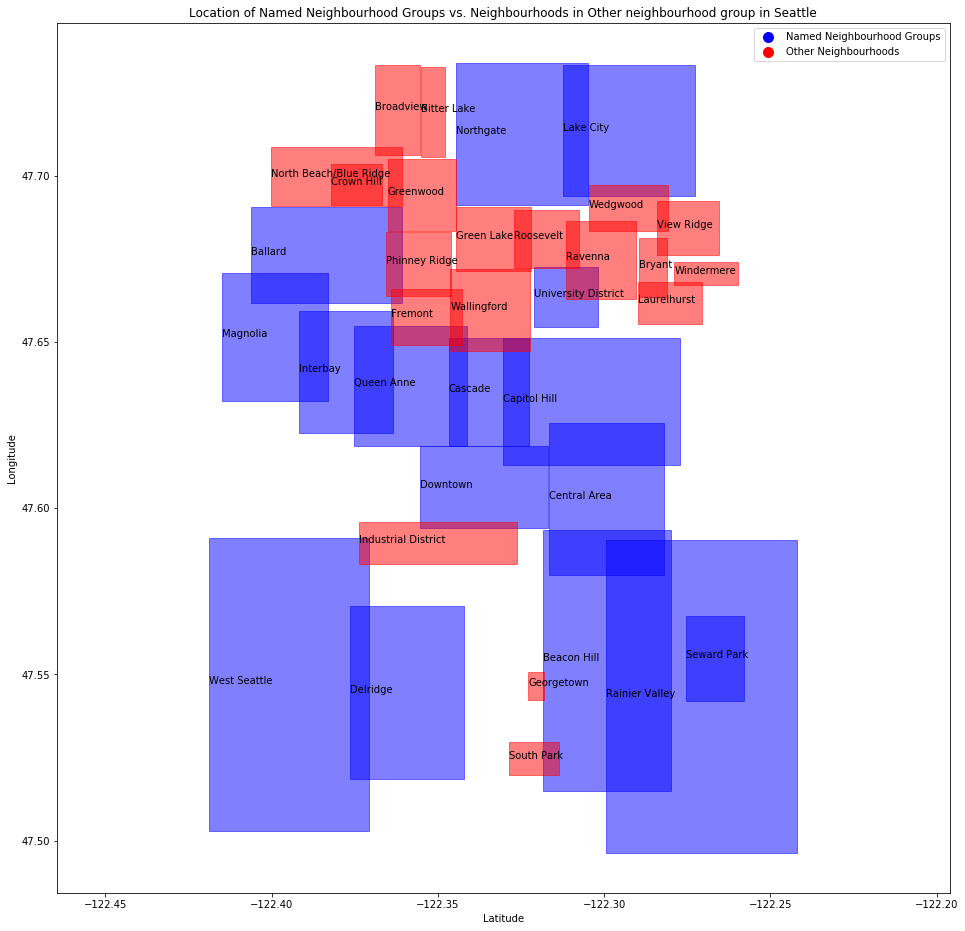

In [25]:
# Plot the data from 'df_sea_group' and 'df_sea_other' on a modified scatter diagram to see their relative postions:
x = df_sea_map.longitude_min
y = df_sea_map.latitude_min
z = np.arange(0, 1, df_sea_map.neighbourhood_group.nunique())
dx = df_sea_map.longitude_ran
dy = df_sea_map.latitude_ran
nom = df_sea_map.neighbourhood_group


x1 = df_sea_map2.longitude_min
y1 = df_sea_map2.latitude_min
z1 = np.arange(0, 1, df_sea_map2.neighbourhood.nunique())
dx1 = df_sea_map2.longitude_ran
dy1 = df_sea_map2.latitude_ran
nom1 = df_sea_map2.neighbourhood


# Your data
a = (x,y,dx,dy,nom)
b = (x1,y1,dx1,dy1,nom1)

# Your scatter plot
fig = plt.figure(figsize = [16, 16])
ax = fig.add_subplot(111)
ax.scatter(a[0], a[1], color = 'blue', s=0,label='Named Neighbourhood Groups')

ax.scatter(b[0], b[1], color = 'red', s=0,label='Other Neighbourhoods')


# Add rectangles
 
for a_x, a_y, width, height, label in zip(*a):
    ax.add_patch(Rectangle(
        xy=(a_x, a_y) ,width=width, height=height,
        linewidth=1, color='blue',alpha=0.5, fill=True))
    ax.annotate(label, xy=(a_x,(a_y+height/2)))
for a_x, a_y, width, height, label in zip(*b):
    ax.add_patch(Rectangle(
        xy=(a_x, a_y) ,width=width, height=height,
        linewidth=1, color='red', alpha=0.5, fill=True))
    ax.annotate(label, xy=(a_x,(a_y+height/2)))
ax.axis('equal')

lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes=[100]
lgnd.legendHandles[1]._sizes=[100]
plt.title('Location of Named Neighbourhood Groups vs. Neighbourhoods in Other neighbourhood group in Seattle')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()

In [26]:
print (df_sea.query("neighbourhood_group == 'Other neighborhoods' ").neighbourhood.unique())
print (df_sea.query("neighbourhood_group == 'Other neighborhoods' ").neighbourhood.nunique())

['Georgetown' 'Wallingford' 'Windermere' 'Fremont' 'Green Lake'
 'Phinney Ridge' 'Crown Hill' 'Greenwood' 'Ravenna' 'Broadview'
 'North Beach/Blue Ridge' 'Bitter Lake' 'View Ridge' 'Laurelhurst'
 'Bryant' 'Roosevelt' 'Wedgwood' 'South Park' 'Industrial District']
19


* the neighbourhoods grouped in `neighbourhood_group` other Neighbourhoods are geographically distinct from the named neighbourhood groups and cannot be reassigned.
* treating "Other Neighbourhoods" as a normal `neighbourhood_group`